# Facial Emotion Recognition with using CNN

Facial expressions are one of the ways humans communicate. Deep learning approaches in human and computer interactions are used in artificial intelligence research as an effective system application process. The detection of emotions or facial expressions in psychology necessitates the examination and evaluation of decisions in anticipating a person's feelings or a group of people communicating. This study proposes the development of a system that can predict and recognize the classification of facial emotions using the Convolution Neural Network (CNN) algorithm and feature extraction. 

Data preprocessing, facial feature extraction, and facial emotion classification are the three key steps in the notebook. Facial expressions were predicted with the accuracy of 62.66 percent with using the Convolutional Neural Network (CNN). This algorithm was evaluated on a publicly available dataset from the FER2013 database, which has 35887 48x48 grayscale face images each representing one of the emotions.

**Table of contents of this notebook:**

**1.** [Importing necessary libraries](#1)

**2.** [Loading the data](#2)

**3.** [Data pre-processing](#3)

**4.** [Design a model](#4)

**5.** [Fine tuning](#5)

<h1 id="1"> <center>1. Importing necessary libraries</center> </h1> <a id="1"></a>

In [25]:
'''
This code installs the scikit-plot package. scikit-plot is a Python package that provides easy-to-use functions for generating various visualizations to evaluate the performance of machine learning models. The %%capture command is a Jupyter Notebook-specific command that suppresses the output of the installation process.
'''
%%capture
!pip install scikit-plot

In [26]:
import pandas as pd #  Imports the pandas library, a powerful library for data manipulation and analysis, and aliases it as pd.
import numpy as np # Imports the numpy library, a library for numerical operations and working with arrays, and aliases it as np.
import scikitplot #  Imports the scikit-plot library, a library for creating visualizations related to machine learning.
import random #  Imports the random module, which contains various functions for generating random numbers.
import seaborn as sns # Imports the seaborn library, a library for creating statistical graphics, and aliases it as sns.
import keras # Imports the Keras library, a high-level neural networks API built on top of TensorFlow.
import os #  Imports the os module, which provides a way to interact with the operating system.
from matplotlib import pyplot # Imports the pyplot module from the matplotlib library, which is used for creating plots and charts.
import matplotlib.pyplot as plt #  Imports the pyplot module from the matplotlib library and aliases it as plt.
import tensorflow as tf # Imports the TensorFlow library, a popular library for machine learning and deep learning, and aliases it as tf.
from tensorflow.keras.utils import to_categorical #  Imports the to_categorical function from TensorFlow's Keras utils, which is used to convert integer labels to one-hot vectors.

import warnings #  Imports the warnings module, which allows handling and filtering of warning messages.
from tensorflow.keras.models import Sequential # Imports the Sequential class from TensorFlow's Keras models, which is a linear stack of layers for building neural networks.

from keras.callbacks import EarlyStopping # Imports the EarlyStopping class from Keras callbacks, which can be used to stop training when a monitored quantity has stopped improving.

from keras import regularizers # Imports the regularizers module from Keras, which includes regularization functions like L1 and L2.
from keras.callbacks import ModelCheckpoint,EarlyStopping # Imports the ModelCheckpoint and EarlyStopping classes from Keras callbacks.
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax # Imports various optimization algorithms from TensorFlow's Keras optimizers, including Adam, RMSprop, Stochastic Gradient Descent (SGD), and Adamax.

from keras.preprocessing.image import ImageDataGenerator,load_img # Imports the ImageDataGenerator and load_img functions from Keras' image preprocessing module, which are used for data augmentation and loading images.

from keras.utils.vis_utils import plot_model #  Imports the plot_model function from Keras' visualization utilities, which is used to plot a neural network model.

from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input # Imports various layer types from Keras' layers module, which are used to build neural networks.

from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model selection module, which is used to split a dataset into training and testing sets.

from sklearn.preprocessing import StandardScaler # Imports the StandardScaler class from scikit-learn's preprocessing module, which is used to standardize features by removing the mean and scaling to unit variance.

warnings.simplefilter("ignore") # Sets the warnings filter to "ignore", which means that no warning messages will be displayed during the execution of the script.

from keras.models import Model #  Imports the Model class from Keras models, which is a base class for Keras models and can be used to create more complex neural network architectures.

from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn's model selection module, which is used to split a dataset into training and testing sets.

from sklearn.metrics import accuracy_score # Imports the accuracy_score function from scikit-learn's metrics module, which is used to compute the accuracy of a classifier's predictions.

from keras.regularizers import l1, l2 # Imports the L1 and L2 regularization functions from Keras' regularizers module, which can be used to apply penalties to the weights of a neural network during training to reduce overfitting.

import plotly.express as px # Imports the Plotly Express library, a high-level interface for creating interactive plots and charts, and aliases it as px.

from matplotlib import pyplot as plt # Imports the pyplot module from the matplotlib library and aliases it as plt, which is used for creating plots and charts.

from sklearn.metrics import confusion_matrix #  Imports the confusion_matrix function from scikit-learn's metrics module, which is used to compute the confusion matrix of a classifier's predictions.

from sklearn.metrics import classification_report # Imports the classification_report function from scikit-learn's metrics module, which is used to generate a text report showing the main classification metrics like precision, recall, and F1-score.

<h1 id="1"> <center>2. Loading the data</center> </h1> <a id="2"></a>

In [27]:
# This code reads a CSV file and loads it into a pandas DataFrame. The file is located in the ../input/fer2013/ directory and is named fer2013.csv. The DataFrame is assigned to the variable data.

data = pd.read_csv("../input/fer2013/fer2013.csv") # Reads the CSV file using pandas' read_csv() function and stores the data in a DataFrame named data.

data.shape # This line of code accesses the shape attribute of the DataFrame data, which returns a tuple representing the dimensions of the DataFrame (number of rows and columns). This is typically used to get a quick sense of the size of the dataset.

(35887, 3)

To see the dataset has any missing values.

In [28]:
data.isnull().sum()

# This part of the code calls the isnull() method on the DataFrame data. This method returns a DataFrame of the same shape as data, with True where an element is null (missing) and False elsewhere.

# This method is then called on the resulting DataFrame of boolean values. It computes the sum of True values along each column (as True is treated as 1 and False as 0). The result is a pandas Series with the same index as the columns of data, showing the total number of missing values per column.


emotion    0
pixels     0
Usage      0
dtype: int64

In [29]:
data.head() # data.head() calls the head() method on the DataFrame data. This method returns the first 5 rows of the DataFrame by default. It's a convenient way to quickly preview the data and get an idea of its structure and content.

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

<h1 id="1"> <center>3. Data pre-processing</center> </h1> <a id="3"></a>

In [30]:
# This code snippet creates a bar plot using the Plotly Express library to visualize the distribution of emotions in the dataset. CLASS_LABELS is a list containing the emotion labels, and data is a DataFrame containing the dataset.

CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"] # Defines the emotion class labels as a list.

# Creates a bar plot using Plotly Express' bar() function and assigns it to the variable fig.
fig = px.bar(
             x = CLASS_LABELS, # Sets the x-axis values to the emotion class labels.
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] ,  # Computes the number of images for each emotion by counting the occurrences of each unique emotion value in the emotion column of the DataFrame. This is used as the y-axis values.

             color = np.unique(data['emotion']) , # Sets the color of each bar based on the unique emotion values.
             color_continuous_scale="Emrld")  # Sets the color scale for the bars to "Emrld".

fig.update_xaxes(title="Emotions") # Updates the x-axis title to "Emotions".
fig.update_yaxes(title = "Number of Images") # Updates the y-axis title to "Number of Images".
fig.update_layout(showlegend = True, # Updates the layout of the figure with a title and legend settings.
    title = { # Sets the title properties for the figure, including the text ("Train Data Distribution"), position, and alignment.
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show() # Displays the generated bar plot.

# This code will display a bar plot showing the number of images in the dataset for each emotion class, helping to visualize the distribution of emotions in the dataset.

## 3.1 Shuffling the data




In [31]:
data = data.sample(frac=1) # Shuffles the DataFrame data by sampling all rows with replacement and assigns the resulting DataFrame back to the variable data. This ensures that the dataset is in a random order before further processing, which is useful when splitting the data into training and validation sets, or when conducting cross-validation.

## 3.2 One Hot Encoding

Then, we will do one hot encoding operation to change the categorical labels as numeric labels to learning algorithm can work better in predictions process.

In [32]:
labels = to_categorical(data[['emotion']], num_classes=7) # The to_categorical() function takes two arguments: the first is an array of integer labels (in this case, the 'emotion' column of the DataFrame), and the second is the number of unique classes (7, in this case, representing the 7 different emotion labels). The function returns an array of one-hot vectors, where each vector has a length equal to the number of unique classes.


Changing image pixels to Numpy array


In [33]:
# This line of code performs the following steps:
train_pixels = data["pixels"]\
    # Converts the "pixels" column of the DataFrame to strings.
    .astype(str)\
    .str\
    # Splits each string in the "pixels" column into a list of strings, where each string represents a pixel value.
    .split(" ")\
    # Converts the resulting pandas Series of lists into a Python list of lists.
    .tolist()
train_pixels = np.uint8(train_pixels) #  Converts the list of lists of strings into a NumPy array of unsigned 8-bit integers. The np.uint8() function is used to cast the pixel values to the appropriate data type. The resulting array, train_pixels, now contains the pixel values in a format suitable for training a neural network.


## 3.3 Standardization

We will change the data structure to feed the standart scaler to implement standardization process to our data. Since StandartScaler() function only takes 2 dimensional array we will reshape the data then apply our scaler to make the mean zero and standart deviation as unit. 

 

In [34]:
pixels = train_pixels.reshape((35887*2304,1)) # The reshape() method is called on the train_pixels array with the new shape specified as a tuple, (35887*2304, 1). The product of 35,887 and 2,304 corresponds to the total number of pixels across all images in the dataset (35,887 images, each with 2,304 pixels). The reshaped array is assigned to the variable pixels.



In [35]:
scaler = StandardScaler() #  Creates an instance of the StandardScaler class and assigns it to the variable scaler. The StandardScaler standardizes features by removing the mean and scaling to unit variance.

pixels = scaler.fit_transform(pixels) # Fits the StandardScaler instance to the pixels data, and then transforms the data by standardizing it. The standardized pixel values are assigned back to the variable pixels.

## 3.4 Reshaping the data (48,48)


After that, we will reshape the data to make our image pixels ready to split operation. 

In [36]:
pixels = train_pixels.reshape((35887, 48, 48,1)) #  The reshape() method is called on the train_pixels array with the new shape specified as a tuple, (35887, 48, 48, 1). The reshaped array is assigned to the variable pixels.

## 3.5 Train test validation split


Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False) # The first call to train_test_split() splits the pixels array (image data) and the labels array (one-hot encoded emotion labels) into training and test sets. The test_size parameter is set to 0.1, meaning that 10% of the data will be reserved for the test set. The shuffle parameter is set to False, so the data is not shuffled before splitting.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False) # The second call to train_test_split() further splits the training data obtained from the previous step into a new training set and a validation set. The test_size parameter is set to 0.1 again, meaning that 10% of the remaining training data will be reserved for the validation set. The shuffle parameter is set to False, so the data is not shuffled before splitting.


In [38]:
#These three lines of code print the shapes of the X_train, X_test, and X_val NumPy arrays, which contain the image data for the training, test, and validation sets, respectively.

print(X_train.shape) # Prints the shape of the X_train array.
print(X_test.shape) # Prints the shape of the X_test array.
print(X_val.shape) # Prints the shape of the X_val array.

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)



We can see some train data containing one sample of each class with the help of this plot code.

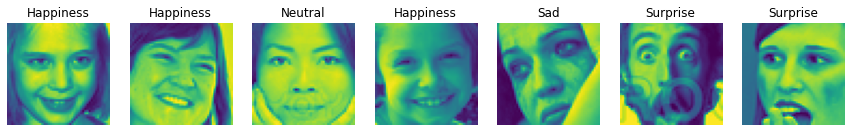

In [39]:
#Now i am going to write a snippet creates a figure with seven subplots, each displaying an image from the X_train dataset along with its corresponding emotion label. The images are visualized using Matplotlib, and the emotion labels are provided in a dictionary called label_dict.

plt.figure(figsize=(15,23)) # Creates a new Matplotlib figure with a custom size of 15 inches wide and 23 inches tall.
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'} # Defines a dictionary mapping integer emotion labels to their string representations.

i = 1 # Initializes a counter variable i with the value 1.
for i in range (7): #  Starts a loop that iterates 7 times, once for each emotion label.
    img = np.squeeze(X_train[i]) # Selects the i-th image from the X_train dataset and removes the single-dimensional entries from its shape using np.squeeze().

    plt.subplot(1,7,i+1) # Creates a subplot in the figure with 1 row and 7 columns, placing the current subplot at position i+1.
    plt.imshow(img) #  Displays the selected image in the current subplot.
    index = np.argmax(y_train[i]) #  Finds the index of the maximum value in the one-hot encoded emotion label for the i-th image, effectively converting it back to an integer label.

    plt.title(label_dict[index]) # Sets the title of the current subplot to the string representation of the emotion label, using the label_dict dictionary.

    plt.axis('off') # Turns off the axis lines and labels for the current subplot.
    i += 1 # Increments the counter variable i by 1.
plt.show()# Displays the final figure with all subplots.

# This code will display a figure containing 7 subplots, each showing one image from the X_train dataset and its corresponding emotion label. This visualization can help you verify that the data has been processed correctly and that the emotion labels match the images.

## 3.6 Data augmentation using ImageDataGenerator.

We can do data augmentation to have more data to train and validate our model to prevent overfitting. Data augmentation can be done on training and validation sets as it helps the model become more generalize and robust.

In [40]:
#  Creates an instance of the, class for the training data with the following transformations:
# The ImageDataGenerator instance for the training data is assigned to the variable datagen.
datagen = ImageDataGenerator(  width_shift_range = 0.1, # Allows the images to be randomly shifted horizontally by up to 10% of their width.
                               height_shift_range = 0.1, # Allows the images to be randomly shifted vertically by up to 10% of their height.
                               horizontal_flip = True, # Allows the images to be randomly flipped horizontally.
                               zoom_range = 0.2) # Allows the images to be randomly zoomed in or out by a factor of 0.2.

# Creates an instance of the ImageDataGenerator class for the validation data with the same set of transformations as the training data. It is assigned to the variable valgen.
valgen = ImageDataGenerator(   width_shift_range = 0.1, # Allows the images to be randomly shifted horizontally by up to 10% of their width.
                               height_shift_range = 0.1, #  Allows the images to be randomly shifted vertically by up to 10% of their height.
                               horizontal_flip = True, #  Allows the images to be randomly flipped horizontally.
                               zoom_range = 0.2) # Allows the images to be randomly zoomed in or out by a factor of 0.2.

# These two lines of code create instances of the ImageDataGenerator class from Keras for data augmentation. Data augmentation is a technique used to artificially increase the size of the dataset by applying random transformations to the images, such as rotation, scaling, flipping, and translation. This helps to improve the performance and generalization of the model, as it learns to recognize the features of interest even under varying conditions.

In [41]:
datagen.fit(X_train) # Fits the ImageDataGenerator instance datagen to the training data X_train. This allows the generator to properly apply the specified data augmentation techniques to the training data when generating augmented images.

valgen.fit(X_val) #  Fits the ImageDataGenerator instance valgen to the validation data X_val. This allows the generator to properly apply the specified data augmentation techniques to the validation data when generating augmented images.

# These two lines of code fit the ImageDataGenerator instances, datagen and valgen, to the training and validation data, respectively. The fit() method computes any required internal statistics or performs any necessary data preprocessing based on the given data.

In [42]:
train_generator = datagen.flow(X_train, y_train, batch_size=64) # Creates a data generator for the training data using the flow() method on the datagen instance. The generator takes the training images X_train and their labels y_train, and produces batches of augmented images and labels. The batch_size parameter is set to 64, meaning that the generator will produce batches of 64 images and labels at a time. The generated data can be used to train the model. The generator is assigned to the variable train_generator.

val_generator = datagen.flow(X_val, y_val, batch_size=64) # Creates a data generator for the validation data using the flow() method on the valgen instance. The generator takes the validation images X_val and their labels y_val, and produces batches of augmented images and labels with the same batch size of 64. The generator is assigned to the variable val_generator.

# These two lines of code create Keras data generators using the flow() method on the ImageDataGenerator instances datagen and valgen. The generators produce batches of augmented images and their corresponding labels for the training and validation data, respectively.

Our dataset is ready to feed our model. We will look at our model architecture.

<h1 id="1"> <center>4.  Design a model </center> </h1> <a id="4"></a>

## 4.1 CNN model

CNN model has many layers with different units such as Convolutional layer, Max pooling layer, Batch normalization and Drop out layer to regularize the model.

In [43]:
def cnn_model():

  model= tf.keras.models.Sequential() # Creates a new Sequential model object.
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1))) # Adds a 2D convolutional layer with 32 filters, a 3x3 kernel size, "same" padding, ReLU activation function, and an input shape of (48, 48, 1) for grayscale images.

  model.add(Conv2D(64,(3,3), padding='same', activation='relu' )) #  Adds another 2D convolutional layer with 64 filters, a 3x3 kernel size, "same" padding, and ReLU activation function.

  model.add(BatchNormalization()) # Adds a batch normalization layer to normalize the activations of the previous layer.
  model.add(MaxPool2D(pool_size=(2, 2))) # Adds a 2D max-pooling layer with a pool size of 2x2 to reduce the spatial dimensions of the input.
  model.add(Dropout(0.25)) # Adds a dropout layer with a rate of 0.25 to prevent overfitting by randomly setting a fraction of input units to 0 during training.

  '''
  The next four blocks of layers follow a similar pattern with varying numbers of filters, kernel sizes, and regularization:

    Conv2D layer.
    BatchNormalization layer.
    MaxPool2D layer.
    Dropout layer.
  '''

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())  # A flatten layer to convert the 3D output of the previous layer into a 1D array.
  model.add(Dense(256,activation = 'relu')) # A fully connected dense layer with 256 units and a ReLU activation function.
  model.add(BatchNormalization()) # Another batch normalization layer.
  model.add(Dropout(0.25)) #  Another dropout layer with a rate of 0.25.
      
  model.add(Dense(512,activation = 'relu')) #Another fully connected dense layer with 512 units and a ReLU activation function.
  model.add(BatchNormalization()) # Another batch normalization layer.
  model.add(Dropout(0.25)) #  Another dropout layer with a rate of 0.25.

  model.add(Dense(7, activation='softmax')) # The output layer of the model, which is a fully connected dense layer with 7 units (corresponding to the 7 emotion classes) and a softmax activation function.

  # Lastly, the model is compiled using the Adam optimizer with a learning rate of 0.0001, categorical crossentropy loss, and the accuracy metric:
  model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model # The function returns the compiled model, which can then be trained and evaluated using the training, validation, and test datasets.

'''
The cnn_model() function defines a convolutional neural network (CNN) model for emotion recognition using TensorFlow and Keras. The function creates a Sequential model and adds several layers to it, including convolutional, batch normalization, max-pooling, dropout, and dense layers. Finally, it compiles the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric. Here's a breakdown of each layer and its purpose:
'''

In [44]:
model = cnn_model() # This line of code creates an instance of the convolutional neural network (CNN) model for emotion recognition by calling the cnn_model() function you defined earlier. The function constructs and compiles the CNN model, and then returns the model. This line of code assigns the created model instance to the variable model.

Then, we compile our model with Adam optimizer with 0.0001 learning rate and chose metric as accuracy, then loss as categorical crossentropy

In [45]:
'''
This line of code re-compiles the model you created in the previous step. However, since the cnn_model() function already compiles the model with the same optimizer, loss, and metrics, this step is redundant and not necessary.

When you called model = cnn_model(), the model was already compiled with the Adam optimizer with a learning rate of 0.0001, categorical crossentropy loss, and accuracy metric.

So, you can proceed to train the model using the training data and evaluate its performance on the validation and test datasets without re-compiling the model.
'''
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [46]:
model.summary() # By calling model.summary(), you request a summary of the model's architecture. The summary will include information about the layers in the model, the output shape of each layer, and the number of parameters (trainable and non-trainable) for each layer. This summary provides a quick and easy way to visualize and understand the model's architecture.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 128)      

## 4.2 Early stopping

Adding checkpointer to implement Early Stopping to prevent overfitting.

In [47]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1,
                              restore_best_weights=True,mode="max",patience = 5), # The EarlyStopping callback monitors the validation accuracy (val_accuracy) during training. If the validation accuracy doesn't improve for 5 consecutive epochs (patience = 5), the training process will be stopped early. The restore_best_weights parameter is set to True, which means that the model will be restored with the weights that achieved the highest validation accuracy. The verbose parameter is set to 1, which means that the callback will print messages when the training process is stopped early. The mode parameter is set to "max", which means that the callback will try to maximize the monitored metric (validation accuracy).

                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")] # The ModelCheckpoint callback saves the model's weights to a file (best_model.h5) during training. It monitors the validation accuracy (val_accuracy) and saves the weights only if the validation accuracy has improved (save_best_only=True). The verbose parameter is set to 1, which means that the callback will print messages when the model's weights are saved. The mode parameter is set to "max", which means that the callback will try to maximize the monitored metric (validation accuracy).

'''
This line of code creates a list named checkpointer containing two Keras callback objects: EarlyStopping and ModelCheckpoint. Callbacks are functions that can be applied at various stages of the training process, such as at the beginning or end of an epoch or batch. They can be used for various purposes, such as stopping training early if the model is no longer improving, or saving the best weights during training.
'''

In [48]:
history = model.fit(train_generator, # The ImageDataGenerator object that generates augmented images for training.
                    epochs=30, # The number of times the model will iterate over the entire training dataset (i.e., 30 training epochs).
                    batch_size=64,   # The number of samples per gradient update (i.e., the batch size). However, this argument is not necessary because the batch size is already specified in the ImageDataGenerator.flow() method.

                    verbose=1, # The verbosity mode, where 1 means progress bars will be displayed during training and 0 means silent.
                    callbacks=[checkpointer], # A list of callbacks to apply during training, which includes the EarlyStopping and ModelCheckpoint callbacks defined earlier.
                    validation_data=val_generator) # The ImageDataGenerator object that generates augmented images for validation.

# The fit() method returns a History object, which contains information about the training process, such as the training and validation losses and accuracies. This information can be used to plot the learning curves and analyze the model's performance during training.

# This line of code starts the training process of the model using the fit() method. It trains the model on the train_generator, which is an ImageDataGenerator object that applies data augmentation to the training images. Here's a breakdown of the arguments passed to the fit() method:

Epoch 1/30
455/455 [==============================] - 17s 34ms/step - loss: 14.0976 - accuracy: 0.1803 - val_loss: 12.8744 - val_accuracy: 0.2563

Epoch 00001: val_accuracy improved from -inf to 0.25635, saving model to best_model.h5
Epoch 2/30
455/455 [==============================] - 15s 34ms/step - loss: 12.2289 - accuracy: 0.2121 - val_loss: 11.1086 - val_accuracy: 0.2570

Epoch 00002: val_accuracy improved from 0.25635 to 0.25697, saving model to best_model.h5
Epoch 3/30
455/455 [==============================] - 15s 33ms/step - loss: 10.3029 - accuracy: 0.2296 - val_loss: 9.1880 - val_accuracy: 0.2675

Epoch 00003: val_accuracy improved from 0.25697 to 0.26749, saving model to best_model.h5
Epoch 4/30
455/455 [==============================] - 18s 40ms/step - loss: 8.4388 - accuracy: 0.2385 - val_loss: 7.4172 - val_accuracy: 0.2638

Epoch 00004: val_accuracy did not improve from 0.26749
Epoch 5/30
455/455 [==============================] - 15s 33ms/step - loss: 6.7678 - accuracy

## 4.3 Visualizing results

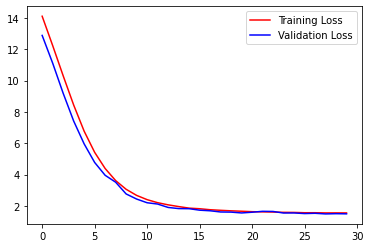

In [51]:
plt.plot(history.history["loss"],'r', label="Training Loss")
'''
plt: the alias for the matplotlib.pyplot module, which provides a simple interface for creating various kinds of plots.
history.history["loss"]: this is accessing the loss value stored in the history object, which is typically returned by a machine learning model after it has been trained. The history object contains the training and validation metrics for the model, such as loss and accuracy, which can be useful for evaluating and visualizing the performance of the model.
'r': this is specifying the color of the line to be red ('r' is short for 'red').
label="Training Loss": this is adding a label to the plot, which will be used in the legend to identify the line.
'''
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
'''
history.history["val_loss"]: this is accessing the val_loss value stored in the history object, which represents the validation loss (i.e., the loss on a held-out validation set) during training.
'b': this is specifying the color of the line to be blue ('b' is short for 'blue').
label="Validation Loss": this is adding a label to the plot, which will be used in the legend to identify the line.
'''
plt.legend() # plt.legend(): this is adding a legend to the plot, which will identify the different lines based on their labels ("Training Loss" and "Validation Loss") and their colors ('r' and 'b'). The legend will be automatically placed in the best location based on the plot size and contents.

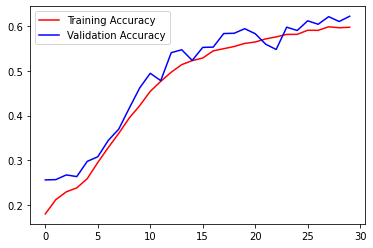

In [52]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
'''
plt: the alias for the matplotlib.pyplot module, which provides a simple interface for creating various kinds of plots.
history.history["accuracy"]: this is accessing the accuracy value stored in the history object, which is typically returned by a machine learning model after it has been trained. The history object contains the training and validation metrics for the model, such as loss and accuracy, which can be useful for evaluating and visualizing the performance of the model.
'r': this is specifying the color of the line to be red ('r' is short for 'red').
label="Training Accuracy": this is adding a label to the plot, which will be used in the legend to identify the line.
'''
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
'''
history.history["val_accuracy"]: this is accessing the val_accuracy value stored in the history object, which represents the validation accuracy (i.e., the accuracy on a held-out validation set) during training.
'b': this is specifying the color of the line to be blue ('b' is short for 'blue').
label="Validation Accuracy": this is adding a label to the plot, which will be used in the legend to identify the line.
'''
plt.legend()
'''
plt.legend(): this is adding a legend to the plot, which will identify the different lines based on their labels ("Training Accuracy" and "Validation Accuracy") and their colors ('r' and 'b'). The legend will be automatically placed in the best location based on the plot size and contents.
'''

In [53]:
loss = model.evaluate(X_test,y_test)
'''
model: the trained machine learning model being evaluated.
X_test: the input data used to test the model.
y_test: the ground truth labels corresponding to the test data.
model.evaluate(X_test,y_test): this evaluates the model on the test data and returns a list of metrics, where loss[0] represents the test loss and loss[1] represents the test accuracy.
loss: the returned list of metrics.
'''
print("Test Acc: " + str(loss[1]))

'''
print(): this function prints the specified string to the console.
"Test Acc: ": a string that will be printed to the console as a label for the test accuracy.
str(loss[1]): converts the test accuracy value to a string and concatenates it with the "Test Acc: " string, so that it can be printed to the console. The loss[1] value represents the test accuracy that was returned from the model.evaluate() function.
'''

113/113 [==============================] - 1s 6ms/step - loss: 1.5022 - accuracy: 0.6160
Test Acc: 0.61604905128479


In [54]:
preds = model.predict(X_test)
'''
model: the trained machine learning model being used to make predictions.
X_test: the input data used to make predictions.
model.predict(X_test): this uses the model to make predictions on the test data, which returns a 2D numpy array containing the predicted probabilities for each input example. Each row of the array corresponds to an example, and each column corresponds to a class label.
'''
y_pred = np.argmax(preds , axis = 1 )
'''
np.argmax(): this function returns the indices of the maximum values along an axis in a numpy array.
preds: the 2D numpy array containing the predicted probabilities for each input example returned by model.predict(X_test).
axis = 1: this specifies that the maximum value should be taken along the second axis of the preds array, which corresponds to the class labels.
y_pred: this is a 1D numpy array containing the predicted labels for each input example in X_test. The predicted label for each example is the index of the class label with the highest probability in the corresponding row of the preds array.
'''

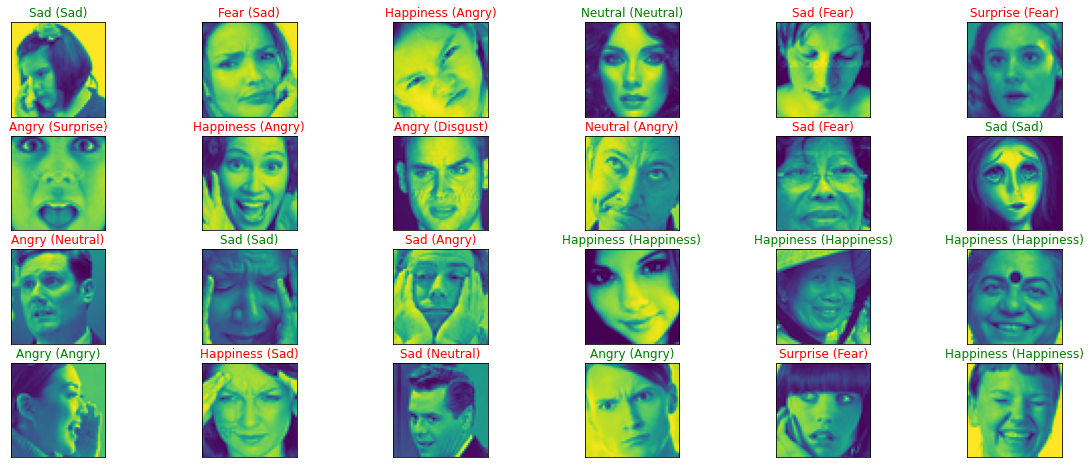

In [55]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'} # label_dict: a Python dictionary that maps the integer label indices (0-6) to their corresponding string labels.

figure = plt.figure(figsize=(20, 8)) # figure: the matplotlib figure object that will be used to display the images and labels., plt.figure(figsize=(20, 8)): this creates a new figure object with a specified size of 20 x 8 inches.

for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)): # i: the index of the current subplot in the figure., index: a randomly selected index from the test set used to display an example image and its predicted and true labels. np.random.choice(X_test.shape[0], size=24, replace=False): this randomly selects 24 indices from the test set without replacement.
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]) # ax: the matplotlib Axes object representing the current subplot in the figure.figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[]): this adds a new subplot to the figure, with 4 rows and 6 columns of subplots. The i + 1 argument specifies the index of the current subplot in the figure, and xticks=[] and yticks=[] remove the tick marks on the x and y axes.

    ax.imshow(np.squeeze(X_test[index])) # ax.imshow(): this displays the image on the subplot. np.squeeze(X_test[index]): this removes any single-dimensional entries from the shape of X_test[index] to ensure that the image is displayed properly.

    predict_index = label_dict[(y_pred[index])] # the predicted label for the current example image, obtained by mapping the predicted label index y_pred[index] to its corresponding string label using the label_dict dictionary.

    true_index = label_dict[np.argmax(y_test,axis=1)[index]] # true_index: the true label for the current example image, obtained by finding the index of the maximum value in the ground truth label y_test[index], and then mapping that index to its corresponding string label using the label_dict dictionary.
    

    '''
    ax.set_title(): this adds a title to the subplot.
    "{} ({})".format((predict_index), (true_index)): the title string that will be displayed on the subplot, which includes the predicted and true labels for the current example image.
    '''
    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red")) # the color of the title text, which is green if the predicted and true labels are the same, and red otherwise.

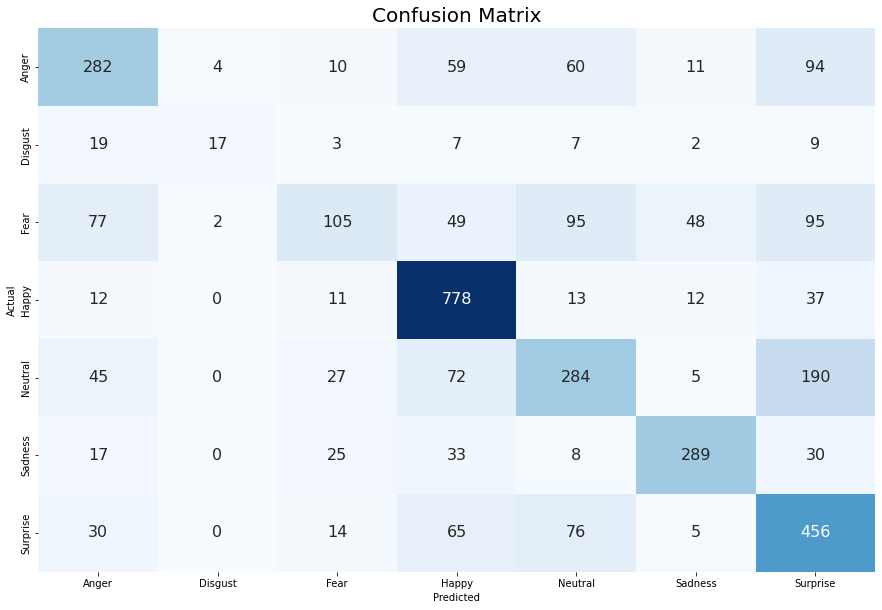

In [56]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"] # a list of string labels for the 7 different emotion classes.

'''
confusion_matrix(): this function from the sklearn.metrics module computes a confusion matrix from the ground truth labels y_test and predicted labels y_pred.
np.argmax(y_test, axis = 1 ): this returns the index of the maximum value along the second axis of the ground truth labels y_test, which corresponds to the true label index.
cm_data: the computed confusion matrix in the form of a 2D numpy array.
'''
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)

'''
pd.DataFrame(): this function from the pandas module creates a dataframe from the cm_data numpy array, with row and column labels specified by the CLASS_LABELS list.
cm.index.name and cm.columns.name: these lines set the names of the row and column indices of the dataframe to 'Actual' and 'Predicted', respectively.
'''
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

'''
plt.figure(): this function creates a new matplotlib figure object for displaying the heatmap.
figsize = (15,10): this sets the size of the figure to 15 inches wide by 10 inches high.
'''
plt.figure(figsize = (15,10))

'''
plt.title(): this adds a title to the heatmap.
'Confusion Matrix': the string that will be displayed as the title of the heatmap.
fontsize = 20: this sets the font size of the title to 20 points.
sns.set(font_scale=1.2): this sets the font scale of the seaborn heatmap to 1.2 times the default font size.
'''
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)

'''
sns.heatmap(): this function from the seaborn library creates a heatmap visualization of the confusion matrix.
cm: the pandas dataframe containing the confusion matrix.
cbar=False: this specifies that a colorbar should not be displayed.
cmap="Blues": this sets the color map used for the heatmap to shades of blue.
annot=True: this specifies that the cell values should be annotated on the heatmap.
annot_kws={"size": 16}: this specifies the font size of the annotations to be 16 points.
fmt='g': this specifies the format of the cell values to be a plain number string.
'''
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [57]:
'''
from sklearn.metrics: the module that contains various metrics for evaluating machine learning models.
import classification_report: this imports the classification_report function, which is used to generate a text report of the classification metrics.
'''
from sklearn.metrics import classification_report

'''
classification_report(): this function from the sklearn.metrics module computes the precision, recall, F1-score, and support for each class in the classification task.
np.argmax(y_test, axis = 1 ): this returns the index of the maximum value along the second axis of the ground truth labels y_test, which corresponds to the true label index.
y_pred: the predicted labels for the test set.
digits=3: this specifies the number of digits to display for the metrics in the report.
print(): this function prints the text report to the console.
'''
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.585     0.542     0.563       520
           1      0.739     0.266     0.391        64
           2      0.538     0.223     0.315       471
           3      0.732     0.902     0.808       863
           4      0.523     0.456     0.487       623
           5      0.777     0.719     0.747       402
           6      0.501     0.706     0.586       646

    accuracy                          0.616      3589
   macro avg      0.628     0.545     0.557      3589
weighted avg      0.613     0.616     0.598      3589



<h1 id="1"> <center>5. Fine tuning</center> </h1> <a id="5"></a>

## 5.1 Changing optimizer

Changing Optimizer to Stochastic Gradient Descent (SGD)

In [58]:
model = cnn_model()

'''
cnn_model(): this function returns an instance of a CNN model. The details of the CNN architecture are defined within the cnn_model() function.
model: the returned instance of the CNN model. This instance can be trained and used to make predictions on new data.
'''

In [59]:
# the CNN model instance that was created using cnn_model().
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), #  the optimizer to use during training. In this case, Stochastic Gradient Descent (SGD) is used with a learning rate of 0.001. The optimizer is responsible for updating the model parameters during training in order to minimize the loss function.
                loss='categorical_crossentropy', # the loss function to use during training. In this case, categorical cross-entropy is used, which is a common loss function used for multi-class classification problems.
                metrics = ['accuracy']) # the evaluation metric(s) to use during training and testing. In this case, only accuracy is used as the metric, which is a measure of the model's ability to correctly classify input examples. During training, the model will be optimized to maximize accuracy, and during testing, the accuracy will be reported to evaluate the model's performance on the test set.

In [60]:
history = model.fit(train_generator, # a data generator that generates batches of training data during training. The data generator was created using the Keras ImageDataGenerator class, which generates augmented images in real-time as the model is training.
                    epochs=30, # the number of epochs (iterations over the entire training set) to train the model for. In this case, the model will be trained for 30 epochs.
                    batch_size=64,  #  the number of training examples to process at once during each training step. In this case, the batch size is set to 64.
                    verbose=1, # this specifies the level of detail to print during training. In this case, verbose=1 will print out progress updates during training for each epoch.
                    callbacks=[checkpointer], #  a list of callbacks to apply during training. In this case, the checkpointer callback is used to save the weights of the best performing model on the validation set.
                    validation_data=val_generator) # a data generator that generates batches of validation data during training. The validation data is used to monitor the model's performance on data that it has not seen during training.

'''
This code is training the compiled CNN model using the Keras fit method, which fits the model to the training data and returns a history object that contains information about the training process.
'''

Epoch 1/30
455/455 [==============================] - 16s 32ms/step - loss: 14.8553 - accuracy: 0.1604 - val_loss: 14.1184 - val_accuracy: 0.1892

Epoch 00001: val_accuracy did not improve from 0.62229
Epoch 2/30
455/455 [==============================] - 15s 32ms/step - loss: 14.4008 - accuracy: 0.1787 - val_loss: 13.8587 - val_accuracy: 0.2186

Epoch 00002: val_accuracy did not improve from 0.62229
Epoch 3/30
455/455 [==============================] - 16s 35ms/step - loss: 14.0637 - accuracy: 0.1870 - val_loss: 13.5903 - val_accuracy: 0.2260

Epoch 00003: val_accuracy did not improve from 0.62229
Epoch 4/30
455/455 [==============================] - 14s 31ms/step - loss: 13.7848 - accuracy: 0.1934 - val_loss: 13.3489 - val_accuracy: 0.2359

Epoch 00004: val_accuracy did not improve from 0.62229
Epoch 5/30
455/455 [==============================] - 15s 33ms/step - loss: 13.5132 - accuracy: 0.2046 - val_loss: 13.1536 - val_accuracy: 0.2307

Epoch 00005: val_accuracy did not improve fro

In [61]:
'''
model.evaluate(): this function evaluates the trained CNN model on the test set, which is represented by X_test and y_test.
X_test: the test set features.
y_test: the test set labels.
loss: a list containing the values of the model's loss function and evaluation metric(s) on the test set. In this case, the loss function is categorical cross-entropy and the evaluation metric is accuracy.
'''
loss = model.evaluate(X_test,y_test)

'''
print(): this function prints the string to the console.
"Test Acc: ": the string that is printed to the console before the value of the test accuracy.
str(loss[1]): the test accuracy value, converted to a string. The test accuracy is the second value in the loss list, so loss[1] retrieves the test accuracy value.
'''
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 6ms/step - loss: 11.7143 - accuracy: 0.2708
Test Acc: 0.2708275318145752


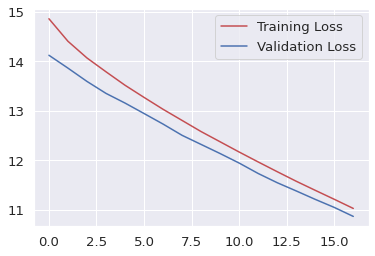

In [62]:
'''
plt.plot(): this function from the matplotlib library plots the training loss over the course of training.
history.history["loss"]: the training loss values stored in the history object returned by the model.fit() method.
'r': a string that specifies the color of the plot, in this case 'r' for red.
label="Training Loss": a string that specifies the label for the plot, which will appear in the plot legend.
'''
plt.plot(history.history["loss"],'r', label="Training Loss")

'''
plt.plot(): this function from the matplotlib library plots the validation loss over the course of training.
history.history["val_loss"]: the validation loss values stored in the history object returned by the model.fit() method.
'b': a string that specifies the color of the plot, in this case 'b' for blue.
label="Validation Loss": a string that specifies the label for the plot, which will appear in the plot legend.
'''
plt.plot(history.history["val_loss"],'b', label="Validation Loss")

'''
plt.legend(): this function from the matplotlib library displays a legend for the plot, which shows the labels specified for each plot in the same order they were plotted.
'''
plt.legend()

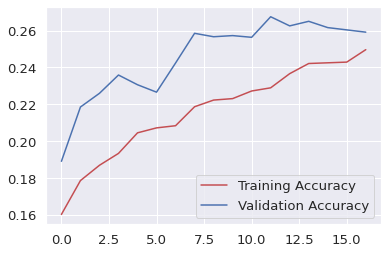

In [63]:
'''
plt.plot(): this function from the matplotlib library plots the training accuracy over the course of training.
history.history["accuracy"]: the training accuracy values stored in the history object returned by the model.fit() method.
'r': a string that specifies the color of the plot, in this case 'r' for red.
label="Training Accuracy": a string that specifies the label for the plot, which will appear in the plot legend.
'''
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")

'''
plt.plot(): this function from the matplotlib library plots the validation accuracy over the course of training.
history.history["val_accuracy"]: the validation accuracy values stored in the history object returned by the model.fit() method.
'b': a string that specifies the color of the plot, in this case 'b' for blue.
label="Validation Accuracy": a string that specifies the label for the plot, which will appear in the plot legend.
'''
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")

'''
plt.legend(): this function from the matplotlib library displays a legend for the plot, which shows the labels specified for each plot in the same order they were plotted.
'''
plt.legend()

The model trained with SGD did not give better results than Adam optimizer.

## 5.2 Changing epoch number.

Let's change the epoch number as 50 for the cnn_model.

In [64]:
'''
cnn_model(): this function returns an instance of a CNN model. The details of the CNN architecture are defined within the cnn_model() function.
model: the returned instance of the CNN model. This instance can be trained and used to make predictions on new data.
'''
model = cnn_model()

In [65]:
model.compile( # the CNN model instance that was created using cnn_model().
    optimizer = Adam(lr=0.0001),  #  the optimizer to use during training. In this case, Adam is used with a learning rate of 0.0001. The optimizer is responsible for updating the model parameters during training in order to minimize the loss function.
    loss='categorical_crossentropy',  # the loss function to use during training. In this case, categorical cross-entropy is used, which is a common loss function used for multi-class classification problems.
    metrics=['accuracy']) #  the evaluation metric(s) to use during training and testing. In this case, only accuracy is used as the metric, which is a measure of the model's ability to correctly classify input examples. During training, the model will be optimized to maximize accuracy, and during testing, the accuracy will be reported to evaluate the model's performance on the test set.

In [66]:
'''
a callback that monitors a specified metric during training and stops training early if the metric stops improving. In this case, the validation accuracy is being monitored, and training will be stopped if the validation accuracy does not improve for 10 epochs (patience = 10). The mode parameter is set to "max" to indicate that the metric being monitored should be maximized.
'''
checkpointer = [EarlyStopping(monitor = 'val_accuracy',
                              verbose = 1,
                              restore_best_weights=True,
                              mode="max",
                              patience = 10),

                '''
                a callback that saves the weights of the best performing model on the validation set during training. In this case, the callback is saving the model weights to a file named 'best_model.h5'. The monitor parameter is set to "val_accuracy" to indicate that the validation accuracy should be monitored to determine the best performing model. The verbose parameter is set to 1 to display a message when a new best model is found. The save_best_only parameter is set to True to ensure that only the weights of the best model are saved. The mode parameter is set to "max" to indicate that the metric being monitored should be maximized.
                '''
                              ModelCheckpoint('best_model.h5',
                                              monitor="val_accuracy",
                                              verbose=1,
                                              save_best_only=True,
                                              mode="max")]

In [67]:
history = model.fit(train_generator, # a data generator that generates batches of training data during training. The data generator was created using the Keras ImageDataGenerator class, which generates augmented images in real-time as the model is training.
                    epochs=50,# the number of epochs (iterations over the entire training set) to train the model for. In this case, the model will be trained for 50 epochs.
                    batch_size=64, # the number of training examples to process at once during each training step. In this case, the batch size is set to 64.
                    verbose=1, # this specifies the level of detail to print during training. In this case, verbose=1 will print out progress updates during training for each epoch.
                    callbacks=[checkpointer], #  a list of callbacks to apply during training. In this case, the checkpointer callback is used to save the weights of the best performing model on the validation set, and to perform early stopping if the validation accuracy does not improve for 10 epochs.
                    validation_data=val_generator) # a data generator that generates batches of validation data during training. The validation data is used to monitor the model's performance on data that it has not seen during training.

'''
This code is training the compiled CNN model using the Keras fit method, which fits the model to the training data and returns a history object that contains information about the training process.
'''

Epoch 1/50
455/455 [==============================] - 16s 33ms/step - loss: 14.1533 - accuracy: 0.1847 - val_loss: 12.9154 - val_accuracy: 0.2542

Epoch 00001: val_accuracy improved from -inf to 0.25418, saving model to best_model.h5
Epoch 2/50
455/455 [==============================] - 16s 35ms/step - loss: 12.3474 - accuracy: 0.2118 - val_loss: 11.1871 - val_accuracy: 0.2619

Epoch 00002: val_accuracy improved from 0.25418 to 0.26192, saving model to best_model.h5
Epoch 3/50
455/455 [==============================] - 14s 32ms/step - loss: 10.4877 - accuracy: 0.2261 - val_loss: 9.4144 - val_accuracy: 0.2616

Epoch 00003: val_accuracy did not improve from 0.26192
Epoch 4/50
455/455 [==============================] - 15s 34ms/step - loss: 8.6524 - accuracy: 0.2442 - val_loss: 7.6351 - val_accuracy: 0.2824

Epoch 00004: val_accuracy improved from 0.26192 to 0.28235, saving model to best_model.h5
Epoch 5/50
455/455 [==============================] - 15s 32ms/step - loss: 7.0043 - accuracy

In [68]:
'''
model.evaluate(): this function evaluates the trained CNN model on the test set, which is represented by X_test and y_test.
X_test: the test set features.
y_test: the test set labels.
loss: a list containing the values of the model's loss function and evaluation metric(s) on the test set. In this case, the loss function is categorical cross-entropy and the evaluation metric is accuracy.
'''
loss = model.evaluate(X_test,y_test)

'''
print(): this function prints the string to the console.
"Test Acc: ": the string that is printed to the console before the value of the test accuracy.
str(loss[1]): the test accuracy value, converted to a string. The test accuracy is the second value in the loss list, so loss[1] retrieves the test accuracy value.
'''
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 1s 7ms/step - loss: 1.4802 - accuracy: 0.6266
Test Acc: 0.6266369223594666


In [69]:
'''
model.predict(): this function applies the trained CNN model to the test set, represented by X_test, and returns the predicted class probabilities for each test example.
X_test: the test set features.
'''
preds = model.predict(X_test)

'''
np.argmax(): this NumPy function returns the indices of the maximum values along an axis.
preds: the predicted class probabilities returned by model.predict().
axis = 1: this specifies that the maximum values should be computed along the second axis, which corresponds to the class probabilities for each test example.
y_pred: an array of predicted class labels for each test example, obtained by taking the index of the maximum value along axis 1. The predicted class label is simply the class with the highest predicted probability.
'''
y_pred = np.argmax(preds , axis = 1 )

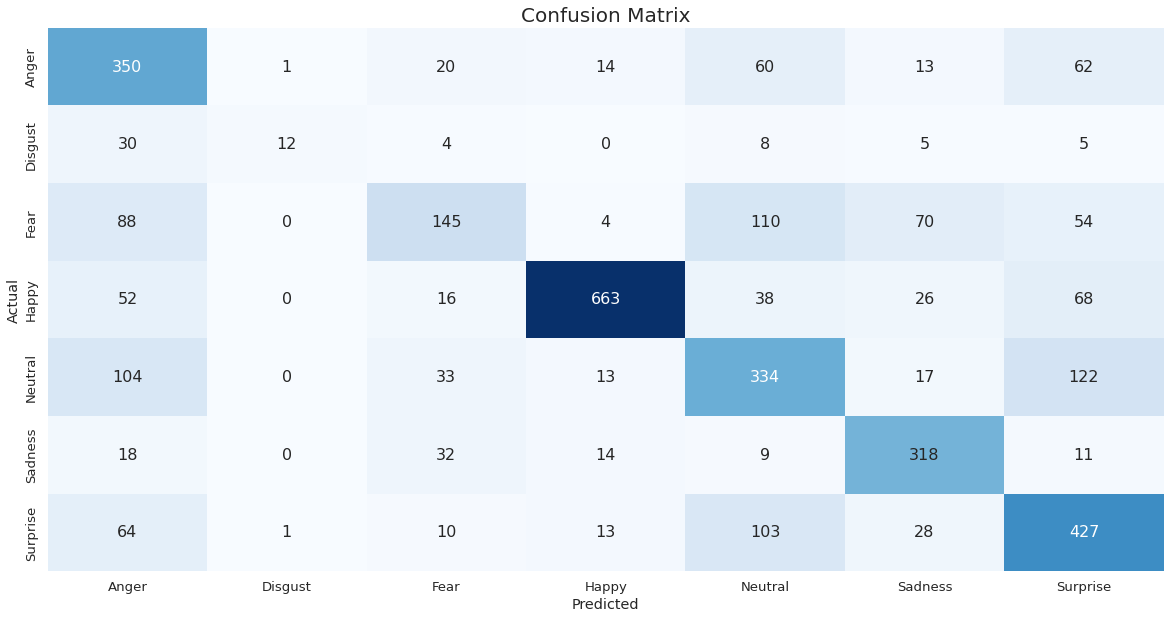

In [70]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"] #  a list containing the class labels for the emotion classification problem.

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [71]:
'''
classification_report(): this function from the scikit-learn library computes and prints a classification report that includes precision, recall, F1 score, and support for each class label, as well as overall precision, recall, and F1 score.
np.argmax(y_test, axis = 1 ): this returns the index of the maximum value along the second axis of y_test, which represents the true class labels for the test set.
y_pred: an array of predicted class labels for each test example, obtained using the model.predict() method and np.argmax() function.
digits=3: the number of digits to use for displaying the metrics. In this case, each metric will be displayed with three decimal places.
'''
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.496     0.673     0.571       520
           1      0.857     0.188     0.308        64
           2      0.558     0.308     0.397       471
           3      0.920     0.768     0.837       863
           4      0.505     0.536     0.520       623
           5      0.667     0.791     0.724       402
           6      0.570     0.661     0.612       646

    accuracy                          0.627      3589
   macro avg      0.653     0.561     0.567      3589
weighted avg      0.646     0.627     0.623      3589



The model trained with 50 epochs has better results than the model trained with 30 epochs.